In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
from tqdm import tqdm
import json
import time
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/fall2022/cse512/project/hypoC

/content/drive/MyDrive/fall2022/cse512/project/hypoC


In [4]:
with open('structure_to_category_epoch.json', 'r') as f:
  data=json.load(f)

In [5]:
def getAccuracy(yhat, y):
  compare=np.equal(y, yhat)
  num_correct=np.count_nonzero(compare)
  return num_correct/len(compare)

Packing all the data

In [6]:
Xtrain=[]
ytrain=[]
Xtest=[]
ytest=[]
for i in range(15000):
  train_video=data[i]
  test_video=data[i+15000]
  Xtrain.append([train_video['published_at'], train_video['trending_date'], train_video['comment_view_ratio']])
  ytrain.append(train_video['category'])

  Xtest.append([test_video['published_at'], test_video['trending_date'], test_video['comment_view_ratio']])
  ytest.append(test_video['category'])

In [13]:
clf=ensemble.RandomForestClassifier(n_estimators=100, max_depth=2).fit(Xtrain, ytrain)

In [14]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.22846666666666668
0.21966666666666668


In [15]:
clf=ensemble.RandomForestClassifier(n_estimators=1000, max_depth=2).fit(Xtrain, ytrain)

In [16]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.23046666666666665
0.2214


In [17]:
clf=ensemble.RandomForestClassifier(n_estimators=100, max_depth=20).fit(Xtrain, ytrain)

In [18]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.9832
0.21866666666666668


In [20]:
test_accuracies=[]
train_accuracies=[]
for i in tqdm(range(2, 101)):
  clf=ensemble.RandomForestClassifier(n_estimators=100, max_depth=i).fit(Xtrain, ytrain)
  pred_train=clf.predict(Xtrain)
  pred_test=clf.predict(Xtest)
  train_accuracies.append(getAccuracy(pred_train, ytrain))
  test_accuracies.append(getAccuracy(pred_test, ytest))

100%|██████████| 99/99 [04:41<00:00,  2.84s/it]


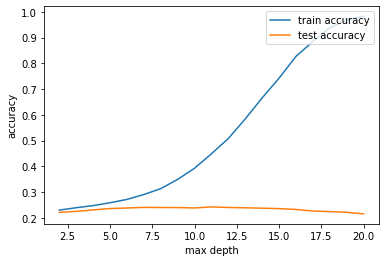

In [30]:
plt.plot(range(2, 21), train_accuracies[:19], label='train accuracy')
plt.plot(range(2, 21), test_accuracies[:19], label='test accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend(loc='upper right')

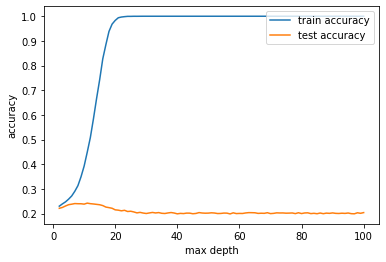

In [31]:
plt.plot(range(2, 101), train_accuracies, label='train accuracy')
plt.plot(range(2, 101), test_accuracies, label='test accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend(loc='upper right')

In [25]:
print(train_accuracies[-1])
print(test_accuracies[-1])

1.0
0.204


ensemble method: ada boost classifier


In [32]:
clf=ensemble.AdaBoostClassifier(n_estimators=200).fit(Xtrain, ytrain)

In [33]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.231
0.21966666666666668


In [35]:
clf=ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=20), n_estimators=200).fit(Xtrain, ytrain)


In [36]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

1.0
0.20013333333333333


In [37]:
test_accuracies=[]
train_accuracies=[]
for i in tqdm(range(1, 21)):
  clf=ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i), n_estimators=200).fit(Xtrain, ytrain)
  pred_train=clf.predict(Xtrain)
  pred_test=clf.predict(Xtest)
  train_accuracies.append(getAccuracy(pred_train, ytrain))
  test_accuracies.append(getAccuracy(pred_test, ytest))

100%|██████████| 20/20 [05:07<00:00, 15.36s/it]


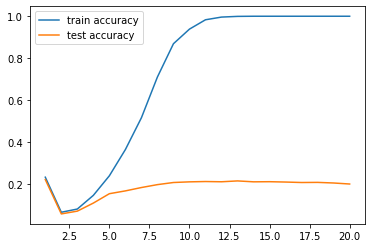

In [40]:
plt.plot(range(1, 21), train_accuracies, label='train accuracy')
plt.plot(range(1, 21), test_accuracies, label='test accuracy')
plt.legend(loc='upper left')

try to do it with svm

In [ ]:
clf=make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
clf.fit(Xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.23213333333333333
0.223


In [11]:
clf=OneVsRestClassifier(svm.SVC()).fit(Xtrain, ytrain)

In [12]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.036333333333333336
0.0366
